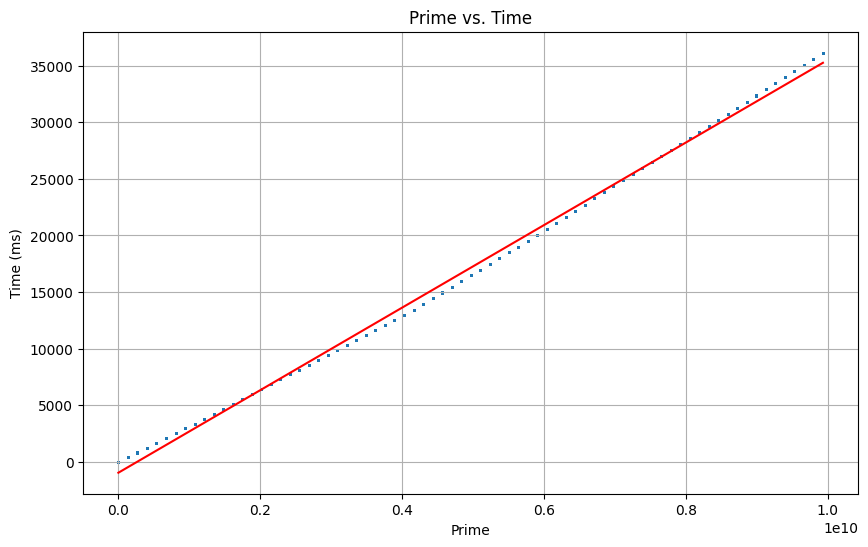

係数（傾き）: 3.6437458851469753e-06
切片: -950.0826249266611
MSE: 276562.48386724916
R2: 0.9976284633982293


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# CSVファイルのパス
file_path = '/content/drive/MyDrive/Colab Notebooks/Prim_CalculatingTime/prime_10th_times.csv'

# CSVファイルを読み込む
df = pd.read_csv(file_path)
prime=df[['Prime']]
time=df['Time']

# データを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(prime, time, test_size=0.2, random_state=42)

# 線形回帰モデルのインスタンスを作成
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(prime)

# # モデルの訓練
# model.fit(X_train, y_train)

# # テストデータに対する予測
y_pred = linear_model.predict(X_test)

# グラフの作成
plt.figure(figsize=(10, 6))
plt.scatter(prime, time, marker='.', s=1, label='Actual Data')
# plt.plot(X_test, y_pred, color='red', label='Linear Regression Model')
plt.plot(prime, linear_predictions, color='red', label='Linear Regression Model')
plt.xlabel('Prime')
plt.ylabel('Time (ms)')
plt.title('Prime vs. Time')
plt.grid(True)
plt.show()

# 平均二乗誤差（MSE）の計算
mse = mean_squared_error(y_test, y_pred)

# 決定係数（R^2）の計算
r2 = r2_score(y_test, y_pred)

print(f"係数（傾き）: {linear_model.coef_[0]}")
print(f"切片: {linear_model.intercept_}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

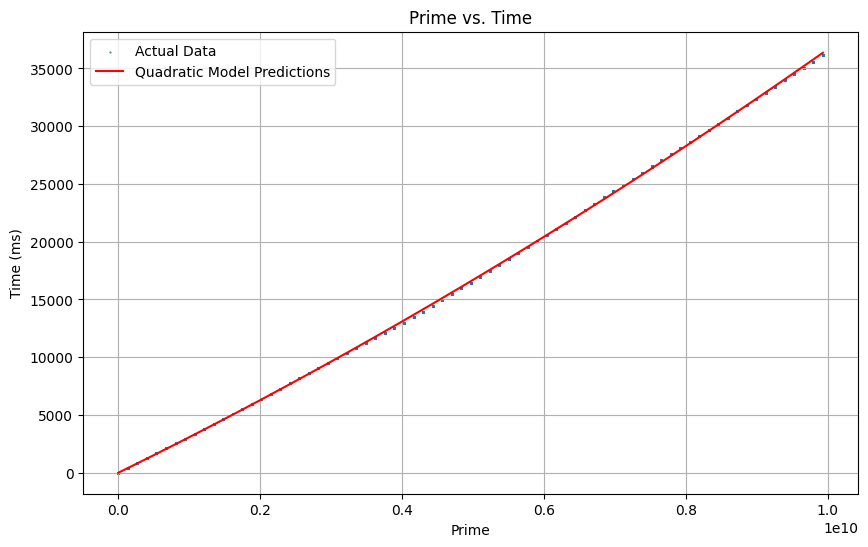

MSE: 11178.957069535192
R2: 0.9999041399054228
Model coefficients: [3.01276779e-06 6.52397566e-17]
Intercept: 0.0


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# CSVファイルのパス
file_path = '/content/drive/MyDrive/Colab Notebooks/Prim_CalculatingTime/prime_10th_times.csv'

# CSVファイルを読み込む
df = pd.read_csv(file_path)
prime = df[['Prime']]
time = df['Time']

# データを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(prime, time, test_size=0.2, random_state=42)

# 2次の多項式モデルを作成し、頂点を原点に設定
quadratic_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression(fit_intercept=False))
quadratic_model.fit(X_train, y_train)
quadratic_predictions = quadratic_model.predict(prime)

# # テストデータに対する予測
y_pred = quadratic_model.predict(X_test)

# グラフの作成
plt.figure(figsize=(10, 6))
plt.scatter(prime, time, marker='.', s=1, label='Actual Data')
plt.plot(prime, quadratic_predictions, color='red', label='Quadratic Model Predictions')
plt.xlabel('Prime')
plt.ylabel('Time (ms)')
plt.title('Prime vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# 平均二乗誤差（MSE）と決定係数（R^2）の計算
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")

# 係数の表示
coefficients = quadratic_model.named_steps['linearregression'].coef_
intercept = quadratic_model.named_steps['linearregression'].intercept_
print(f"Model coefficients: {coefficients}")
print(f"Intercept: {intercept}")

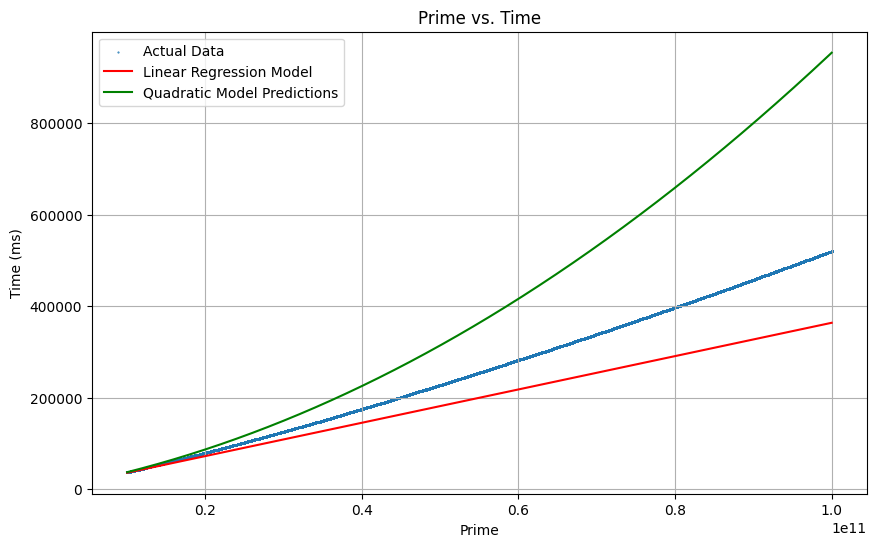

Filtered Linear Model MSE: 5931763559.578197, R2: 0.70153617555231
Filtered Quadratic Model MSE: 36795046055.52656, R2: -0.8513870379624957


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# CSVファイルのパス
file_path = '/content/drive/MyDrive/Colab Notebooks/Prim_CalculatingTime/prime_11th_times.csv'

# CSVファイルを読み込む
df = pd.read_csv(file_path)
df_filtered = df[df['Prime'] > 10**10]
prime=df[['Prime']]
time=df['Time']

linear_predictions = linear_model.predict(df_filtered[['Prime']])
quadratic_predictions = quadratic_model.predict(df_filtered[['Prime']])

# # データを訓練セットとテストセットに分割
# X_train, X_test, y_train, y_test = train_test_split(prime, time, test_size=0.2, random_state=42)

# # 線形回帰モデル
# linear_model = LinearRegression()
# linear_model.fit(X_train, y_train)
# linear_predictions = linear_model.predict(prime)
# linear_y_pred = linear_model.predict(X_test)

# # 非線形モデル
# quadratic_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
# quadratic_model.fit(X_train, y_train)
# quadratic_predictions = quadratic_model.predict(prime)
# quadratic_y_pred = quadratic_model.predict(X_test)

# グラフの作成
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['Prime'], df_filtered['Time'], marker='.', s=1, label='Actual Data')
plt.plot(df_filtered['Prime'], linear_predictions, color='red', label='Linear Regression Model')
plt.plot(df_filtered['Prime'], quadratic_predictions, color='green', label='Quadratic Model Predictions')

plt.xlabel('Prime')
plt.ylabel('Time (ms)')
plt.title('Prime vs. Time')
plt.legend()
plt.grid(True)
plt.show()

linear_mse_filtered = mean_squared_error(df_filtered['Time'], linear_predictions)
linear_r2_filtered = r2_score(df_filtered['Time'], linear_predictions)

quadratic_mse_filtered = mean_squared_error(df_filtered['Time'], quadratic_predictions)
quadratic_r2_filtered = r2_score(df_filtered['Time'], quadratic_predictions)

print(f"Filtered Linear Model MSE: {linear_mse_filtered}, R2: {linear_r2_filtered}")
print(f"Filtered Quadratic Model MSE: {quadratic_mse_filtered}, R2: {quadratic_r2_filtered}")

# # 線形モデルのMSEとR^2
# linear_mse = mean_squared_error(y_test, linear_y_pred)
# linear_r2 = r2_score(y_test, linear_y_pred)

# # 非線形モデルのMSEとR^2
# quadratic_mse = mean_squared_error(y_test, quadratic_y_pred)
# quadratic_r2 = r2_score(y_test, quadratic_y_pred)

# print(f"Linear Model MSE: {linear_mse}, R^2: {linear_r2}")
# print(f"Quadratic Model MSE: {quadratic_mse}, R^2: {quadratic_r2}")

# # 係数の表示
# linear_coefficients = linear_model.coef_
# quadratic_coefficients = quadratic_model.named_steps['linearregression'].coef_
# print(f"Linear Model coefficients: {linear_coefficients}")
# print(f"Quadratic Model coefficients: {quadratic_coefficients}")

In [35]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful